# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# partial_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | otis orchards-east farms
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | half moon
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | onguday
Processing Record 8 of Set 1 | yatou
Processing Record 9 of Set 1 | kencong
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | tamanrasset
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | oroqen zizhiqi
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | port elizabe

Processing Record 41 of Set 4 | mangrol
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | conduaga
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | vung tau
Processing Record 46 of Set 4 | al wajh
Processing Record 47 of Set 4 | vadso
Processing Record 48 of Set 4 | weno
Processing Record 49 of Set 4 | urzhar
Processing Record 0 of Set 5 | dubna
Processing Record 1 of Set 5 | cat ba
City not found. Skipping...
Processing Record 2 of Set 5 | shimanovsk
Processing Record 3 of Set 5 | puerto lleras
Processing Record 4 of Set 5 | malango
Processing Record 5 of Set 5 | nadi
Processing Record 6 of Set 5 | kone
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | putyvl'
Processing Record 9 of Set 5 | nadym
Processing Record 10 of Set 5 | homer
Processing Record 11 of Set 5 | bushehr
Processing Record 12 of Set 5 | happy valley-goose bay
Processing Record 13 of Set 5 | bridgewater
Processing Record 14 of Set 5 | taitung city
Pro

Processing Record 32 of Set 8 | at taj
Processing Record 33 of Set 8 | hawaiian paradise park
Processing Record 34 of Set 8 | knyaze-volkonskoye
Processing Record 35 of Set 8 | hubynykha
Processing Record 36 of Set 8 | ardatov
Processing Record 37 of Set 8 | porto franco
Processing Record 38 of Set 8 | trat
Processing Record 39 of Set 8 | sorong
Processing Record 40 of Set 8 | khandud
Processing Record 41 of Set 8 | crane
Processing Record 42 of Set 8 | moapa valley
Processing Record 43 of Set 8 | shuangjiang
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | acaponeta
Processing Record 46 of Set 8 | singa
Processing Record 47 of Set 8 | mhamid
Processing Record 48 of Set 8 | kapuskasing
Processing Record 49 of Set 8 | kalkaman
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | udachny
Processing Record 2 of Set 9 | alakurtti
Processing Record 3 of Set 9 | soria
Processing Record 4 of Set 9 | kiunga
Processing Record 5 of Set 9 | saint-joseph


Processing Record 16 of Set 12 | flin flon
Processing Record 17 of Set 12 | tezu
Processing Record 18 of Set 12 | datong
Processing Record 19 of Set 12 | ohrid
Processing Record 20 of Set 12 | camana
Processing Record 21 of Set 12 | masterton
Processing Record 22 of Set 12 | kataragama
City not found. Skipping...
Processing Record 23 of Set 12 | los osos
Processing Record 24 of Set 12 | monroeville
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | luderitz
Processing Record 27 of Set 12 | severo-yeniseyskiy
Processing Record 28 of Set 12 | big bend
Processing Record 29 of Set 12 | flying fish cove
Processing Record 30 of Set 12 | beyla
Processing Record 31 of Set 12 | san luis
Processing Record 32 of Set 12 | kyzyl-mazhalyk
Processing Record 33 of Set 12 | turkmenbasy
Processing Record 34 of Set 12 | nhamunda
Processing Record 35 of Set 12 | kalevala
Processing Record 36 of Set 12 | mount gambier
Processing Record 37 of Set 12 | djamaa
Processing Record 38 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,24.14,94,20,3.33,PT,1690507058
1,otis orchards-east farms,47.7099,-117.0798,30.53,25,0,0.00,US,1690507058
2,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690507054
3,half moon,34.8260,-77.4594,28.99,84,40,3.60,US,1690507058
4,kodiak,57.7900,-152.4072,12.73,88,100,4.63,US,1690507058


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,24.14,94,20,3.33,PT,1690507058
1,otis orchards-east farms,47.7099,-117.0798,30.53,25,0,0.00,US,1690507058
2,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690507054
3,half moon,34.8260,-77.4594,28.99,84,40,3.60,US,1690507058
4,kodiak,57.7900,-152.4072,12.73,88,100,4.63,US,1690507058


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

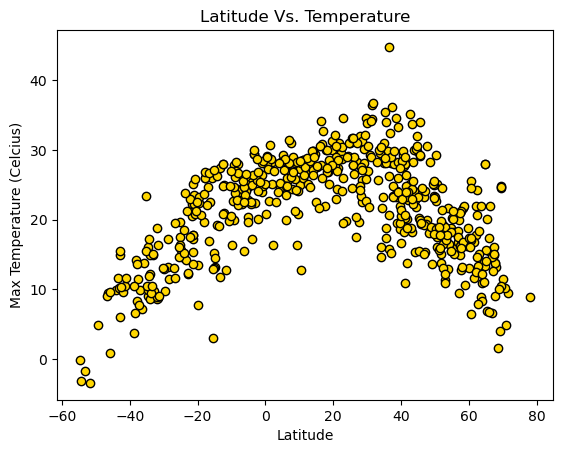

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",color="gold")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celcius)")
plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

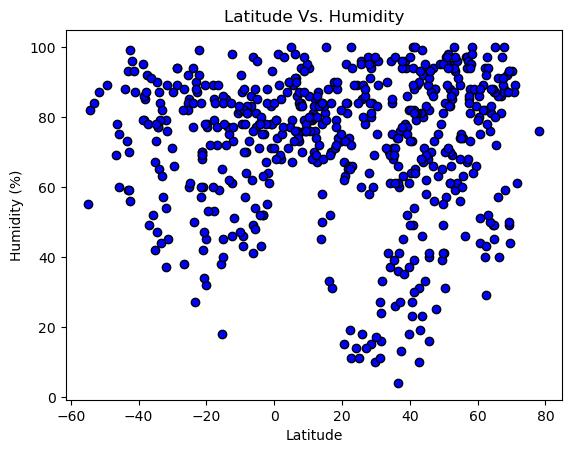

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude Vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

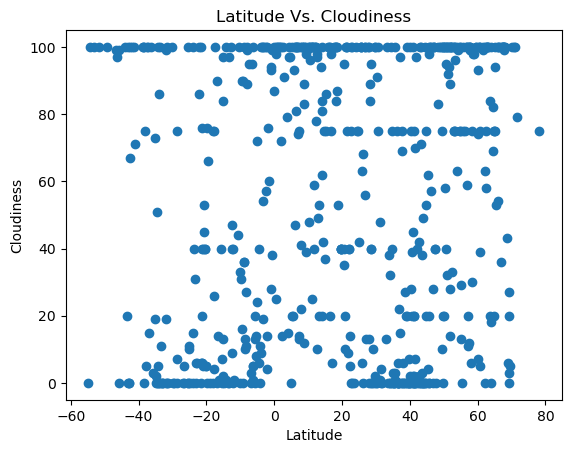

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

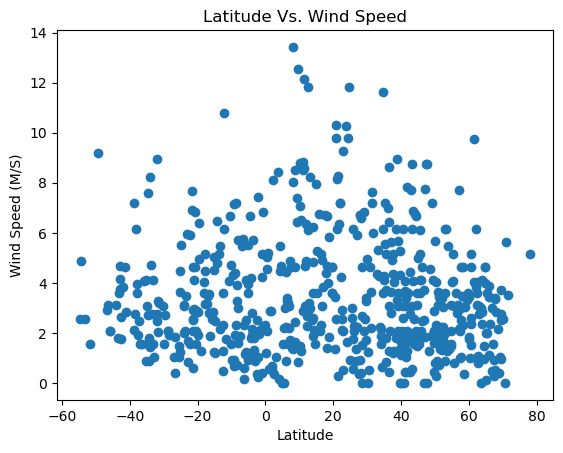

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (M/S)")
plt.title("Latitude Vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'x_values' is not defined

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,24.14,94,20,3.33,PT,1690507058
1,otis orchards-east farms,47.7099,-117.0798,30.53,25,0,0.00,US,1690507058
3,half moon,34.8260,-77.4594,28.99,84,40,3.60,US,1690507058
4,kodiak,57.7900,-152.4072,12.73,88,100,4.63,US,1690507058
6,onguday,50.7500,86.1500,16.01,97,100,1.95,RU,1690507058


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.84,89,100,9.20,TF,1690507054
5,ushuaia,-54.8000,-68.3000,-0.19,55,0,2.57,AR,1690507058
8,kencong,-8.2833,113.3667,24.34,70,11,0.71,ID,1690507059
9,edinburgh of the seven seas,-37.0676,-12.3116,9.89,49,15,1.57,SH,1690507059
13,waitangi,-43.9535,-176.5597,9.90,88,100,3.13,NZ,1690507059


###  Temperature vs. Latitude Linear Regression Plot

-0.6219783943476446


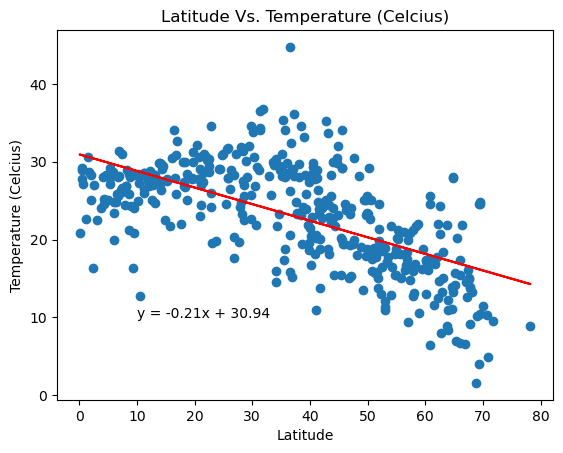

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celcius)")
plt.title("(NH) Latitude Vs. Temperature (Celcius)")
plt.annotate(line_eq,(10,10))
print(rvalue)

0.8178938755554005


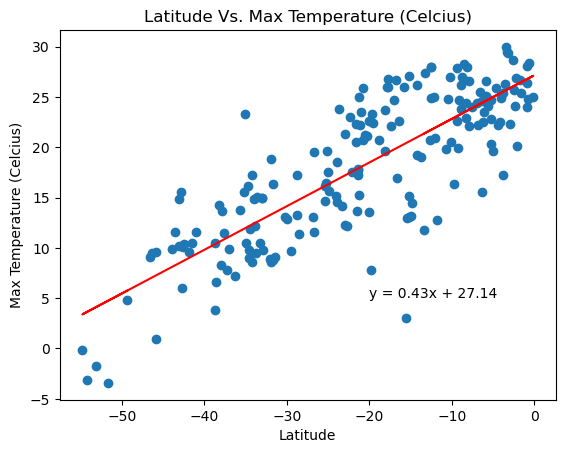

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celcius)")
plt.title("(SH) Latitude Vs. Max Temperature (Celcius)")
plt.annotate(line_eq,(-20,5))
print(rvalue)

The data shows that the closer the city is to the equator the higher the max temperature. This can be seen with how the NH graph has a negatively strong r value and the SH has a positively strong r value. The SH shows a stronger correlation meanwhile the NH has more cities that stray from the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

-0.0122591941603917


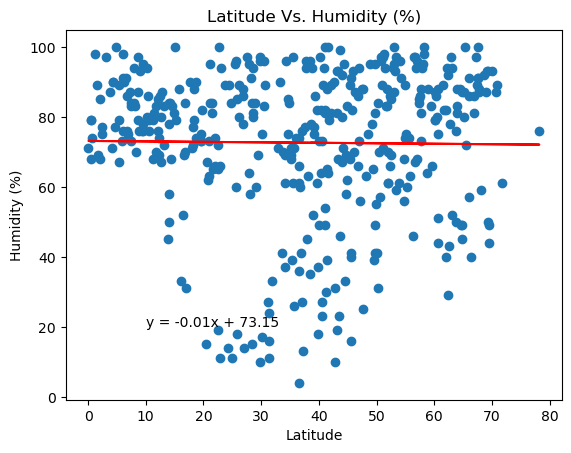

In [18]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("(NH) Latitude Vs. Humidity (%)")
plt.annotate(line_eq,(10,20))
print(rvalue)

-0.0982726273285835


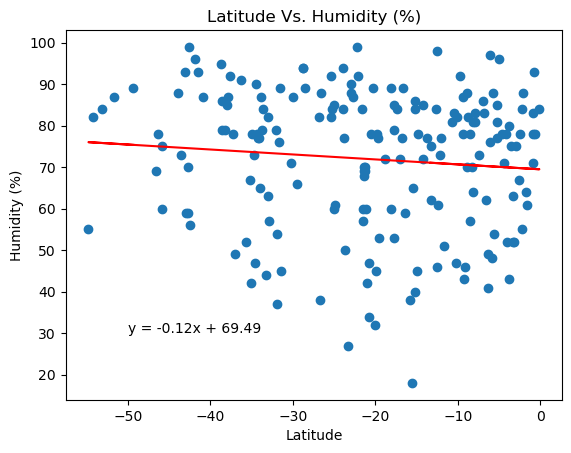

In [19]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("(SH) Latitude Vs. Humidity (%)")
plt.annotate(line_eq,(-50,30))
print(rvalue)

Both graphs of the NH and SH show almost no relationship between latitude and humidity. The r value supports this because both are extremely close to 0. One thing that stands out however is that between 25 to 35 and -25 to -35 there seems to be a small spike of cities with low humidity. The overall data shows no relationship however there might be an affect in only those ranges.

### Cloudiness vs. Latitude Linear Regression Plot

-0.02248291381048091


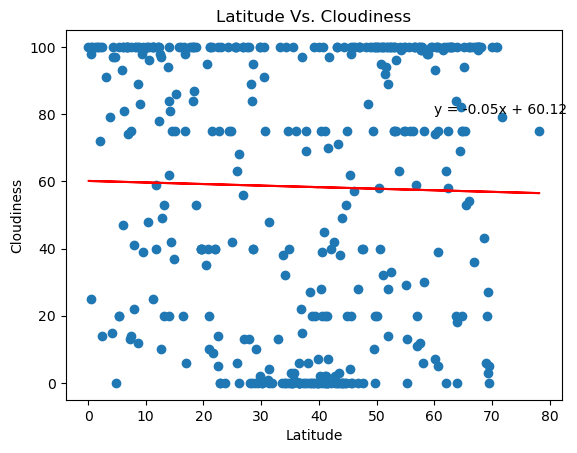

In [20]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("(NH) Latitude Vs. Cloudiness")
plt.annotate(line_eq,(60,80))
print(rvalue)

-0.062170879107032145


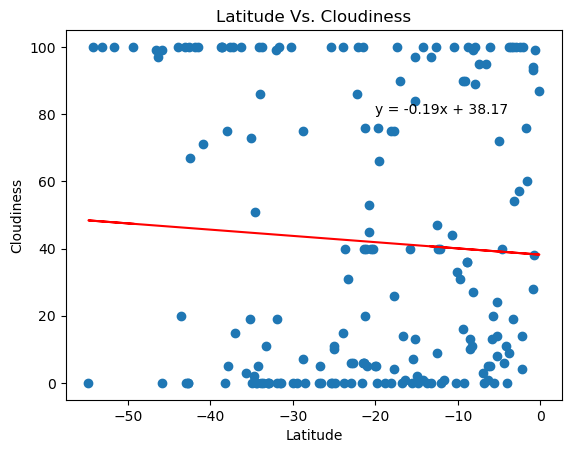

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("(SH) Latitude Vs. Cloudiness")
plt.annotate(line_eq,(-20,80))
print(rvalue)

Similarly to humidity vs latitude, there seems to be no relationship between cloudiness and latitude. This is also supported by the r value both being close to 0. Most locations either have very high cloudiness or very low cloudiness with very few cities being in the middle range for cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

-0.2247469393220084


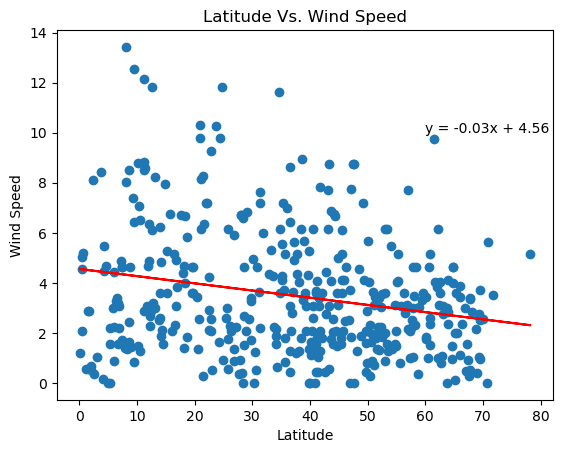

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("(NH) Latitude Vs. Wind Speed")
plt.annotate(line_eq,(60,10))
print(rvalue)

-0.02319402621373035


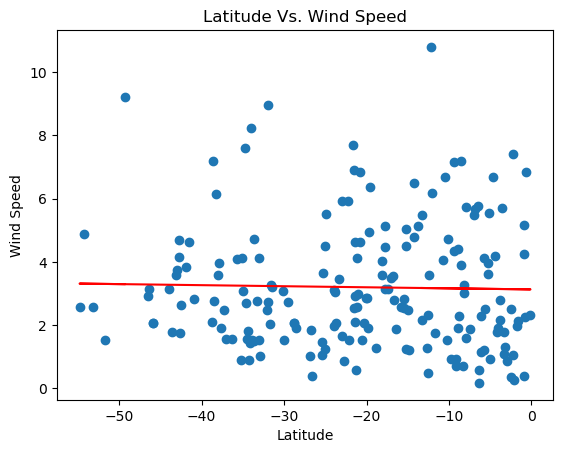

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"-r")
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("(SH) Latitude Vs. Wind Speed")
plt.annotate(line_eq,(-20,9))
print(rvalue)

Wind speed and latitude have no relationship due to their r value. The NH has a slight relationship however it is quite low. Meanwhile the SH shows an obvious no relationship which can be seen in the graph with low slope for the linear regression line. 